# Introduction to Numpy, Scipy and Astropy

Author: Kazi Abu Rousan Intro2Astro 2023 

## NumPy

NumPy is a python library, which is used all over Scientific Community. We will see a brief introduction to numpy.

In our case, We will be using NumPy mostly for creating Arrays. But it is not all. NumPy can do wonders. Let's see what they can do.

### Creating Arrays

In [1]:
import numpy as np #used to import library

The most easiest way to create a numpy array is to convert a python list into array.

In [2]:
A = [1,3,45,8]
#To convert into numpy array
A_np = np.array(A)
print(A, type(A))
print(A_np, type(A_np))

[1, 3, 45, 8] <class 'list'>
[ 1  3 45  8] <class 'numpy.ndarray'>


In [3]:
a_np = np.ones(10000)
print(a_np,len(a_np))

[1. 1. 1. ... 1. 1. 1.] 10000


In [4]:
import time
start_time = time.time()
np.sum(a_np)
end_time = time.time()
print('array took',(end_time-start_time)*1e3,'milli seconds')

array took 0.2009868621826172 milli seconds


In [5]:
a = list(a_np)
start_time = time.time()
sum(a)
end_time = time.time()
print('list took',(end_time-start_time)*1e3,'milli seconds')

list took 2.4199485778808594 milli seconds


In [6]:
#Some more example
a1 = np.array([4,6,8,2])
a2 = np.zeros(10)#create array of only zeros
print(a2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
a3 = np.zeros([2,2])#create a 2X2 matrix
print(a3)

[[0. 0.]
 [0. 0.]]


In [8]:
a4 = np.random.random(10)#create an array of random number in 0 to 1
print(a4)

[0.40590897 0.61091988 0.55856456 0.48468377 0.72806677 0.34543358
 0.36084448 0.66417936 0.53406147 0.18139361]


In [9]:
a5 = np.random.randn(10)
print(a5)#returns an array of random numbers from normal distribution

[-1.56959914  0.52905211 -0.41197246 -0.23446155 -1.40928031 -1.30944609
  0.86403694  0.18674855 -0.13010314  0.37773384]


In [10]:
a6 = np.linspace(0, 10, 20)
print(a6)#Create an array containing 20 numbers from 0 to 20(including 20)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


In [11]:
a7 = np.arange(0, 10, 0.2)
print(a7)#create an array containing 0 to 10 (not include 10)
#each element of the array will contains elements such that they differe by 0.2

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]


In [12]:
a8 = np.logspace(0,4,num=4,base=10)
print(a8)#In linear space, the sequence starts at base ** start 
#(base to the power of start) and ends with base ** stop (see endpoint below).

[1.00000000e+00 2.15443469e+01 4.64158883e+02 1.00000000e+04]


### Accessing data of array and Slicing

We can access elements of array just like we do for normal lists

In [16]:
print(a6)
a6[2]#returns (3+1)th data of array

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


1.0526315789473684

In [20]:
a6[-3]#returns 2nd data from last element

8.947368421052632

In [24]:
a6*6#retruns square of all elemets of the array

array([ 0.        ,  3.15789474,  6.31578947,  9.47368421, 12.63157895,
       15.78947368, 18.94736842, 22.10526316, 25.26315789, 28.42105263,
       31.57894737, 34.73684211, 37.89473684, 41.05263158, 44.21052632,
       47.36842105, 50.52631579, 53.68421053, 56.84210526, 60.        ])

In [25]:
np.sin(a6)#/a6#Compute sinc(x)
#Note: (sinx/x) for x = 0 is not defined

array([ 0.        ,  0.50235115,  0.86872962,  0.99996678,  0.86054034,
        0.48818921, -0.01630136, -0.5163796 , -0.87668803, -0.99970104,
       -0.85212237, -0.47389753,  0.03259839,  0.53027082,  0.88441346,
        0.99916962,  0.84347795,  0.4594799 , -0.04888676, -0.54402111])

In [26]:
import matplotlib.pyplot as plt#let's plot some basic function

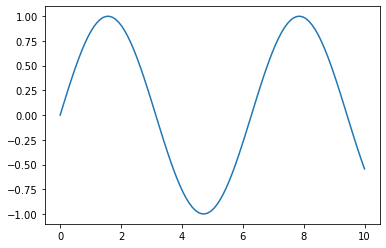

In [29]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [30]:
a = np.array([1,2,3,4,5,6,7,8])
a[:]#gives full array

array([1, 2, 3, 4, 5, 6, 7, 8])

In [31]:
a[2:5]#returns an array from 2nd indexed element to 4th indexed element of array a

array([3, 4, 5])

In [34]:
a[1:7:1]# returns an array of elements starting from a[1] to a[7] but with a index gap of 2

array([2, 3, 4, 5, 6, 7])

We can also use negative indexes, give it a try.

### Masks and Filtering

We can also check conditions using basic logics and filter arrays and also create masks.

In [35]:
a = np.array([2,4,5,6,7,8,10])
a>5

array([False, False, False,  True,  True,  True,  True])

In [39]:
a[(a>5) & (a<8)]#Only returns elements which satisfy the conditions

array([6, 7])

We will see mask creation in the matplotlib tutorial

### Statistics with numpy

In [40]:
a = np.random.randn(10000)+6

(array([  18.,  106.,  503., 1446., 2580., 2799., 1769.,  640.,  122.,
          17.]),
 array([2.28555249, 3.0137477 , 3.74194292, 4.47013813, 5.19833335,
        5.92652856, 6.65472378, 7.38291899, 8.11111421, 8.83930942,
        9.56750464]),
 <BarContainer object of 10 artists>)

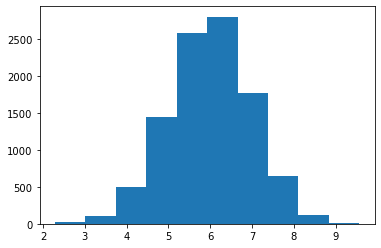

In [41]:
plt.hist(a)

In [42]:
np.mean(a)#Find mean of all elements of array a

6.001308945750224

In [43]:
np.std(a)#Find standard divison

0.9860813619644543

In [44]:
a = np.array([1,2,3])
np.cumsum(a)#Find cumulative sum
#1, 1+2, 1+2+3

array([1, 3, 6])

### Calculus with NumPy

To perform derivative

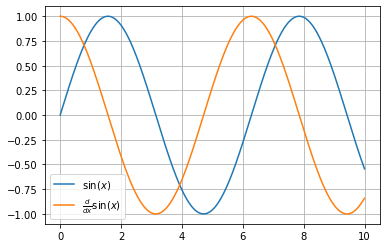

In [45]:
x = np.linspace(0,10,1000)
y = np.sin(x)
dy_dx = np.gradient(y,x)#Find derivative
plt.plot(x,y,label=r"$\sin(x)$")
plt.plot(x,dy_dx,label=r"$\frac{d}{dx}\sin(x)$")
plt.legend()
plt.grid()
plt.show()

To perfrom Integration

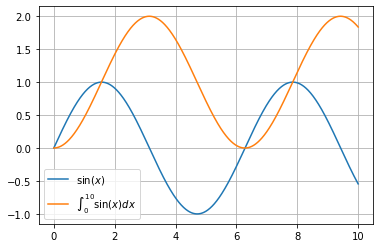

In [46]:
y_integrate = np.cumsum(y)*(x[1]-x[0])
plt.plot(x,y,label=r"$\sin(x)$")
plt.plot(x,y_integrate,label=r"$\int_0^{10}\sin(x) dx$")
plt.legend()
plt.grid()
plt.show()#Comment on the graph of this one

### Multidimensional Array

In [47]:
a1 = np.array([[1,23,8],[2,7,8],[8,0,9]])
a1#This is a multidimensional array -- tensor

array([[ 1, 23,  8],
       [ 2,  7,  8],
       [ 8,  0,  9]])

In [48]:
a1.shape#Returns the size along row and column

(3, 3)

## SciPy (Scientific Python) contains many useful functions that will be useful by scientists. most notable parameter Optimization, integration, interpolation, and signal processing.

### Interpolation of Data

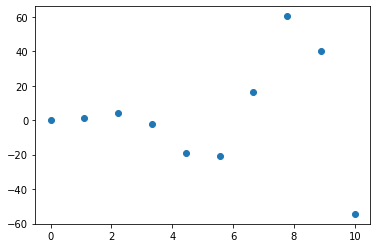

In [49]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)
plt.show()

In [50]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind='cubic')#GIVES A CUBIC FUNCTION which goes through each point
x_f = np.linspace(0, 10, 100)
y_f = f(x_f)

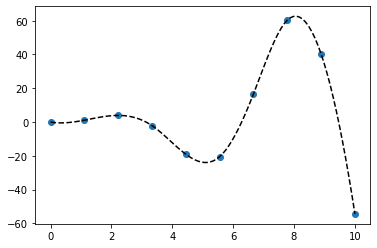

In [51]:
plt.plot(x_f, y_f,ls="--",c="Black")
plt.scatter(x, y)
plt.show()

### Curve Fitting

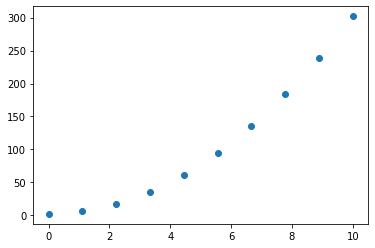

In [54]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2+np.random.normal(10)*0.01
plt.scatter(x_data, y_data); plt.show()

[3.         2.12846115]


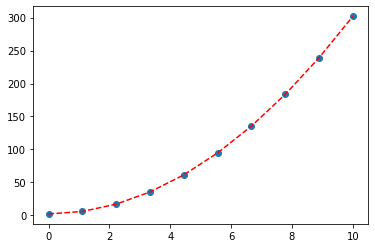

In [55]:
from scipy.optimize import curve_fit

def func(x, a, b):#you can use any function
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
print(popt)#first element is a's value, 2nd is b's value

plt.scatter(x_data, y_data)
plt.plot(x_data,popt[0]*x_data**2 + popt[1],'--', color = 'red')


Let's see an example similar to the one discussed in the video

In [56]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

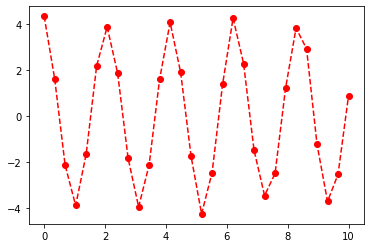

In [57]:
plt.plot(t_data,y_data,'o--',c="Red")
plt.show()

We can see and give some guess values.

$A = 4$, $\phi = 0$ and $T\approx 2$

In [58]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836218, 2.99899521, 0.10411349])

We are getting almost same value!!

In [59]:
A, w, phi = popt

In [60]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

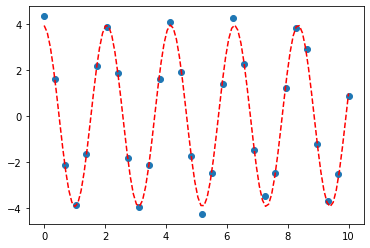

In [61]:
plt.scatter(t_data,y_data)
plt.plot(t,y,color="Red",ls="--")
plt.show()

So, It nicely agrees with the data

### Special Functions

In physics, we many times need some special functions like bessel function, Legendre and many more. This things can also be accessed using scipy.

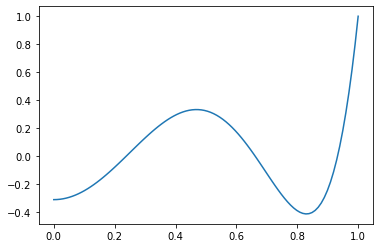

In [62]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

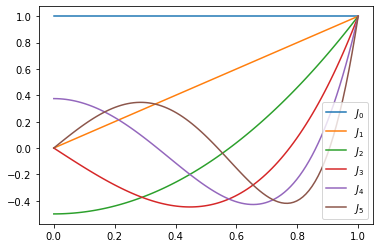

In [63]:
for i in range(6):
    plt.plot(x, legendre(i)(x),label=r"$J_%s$"%i)
plt.legend()
plt.show()

## Astropy

**Astropy** is a community-driven Python package containing many tools and functions that are useful for doing astronomy and astrophysics, from observation planning, data reduction and data analysis to modelling and numerical calculations.

To install it run `pip install astropy`

Astropy has many features. But let's start with the simplest ones.

### Constants and Unit Convertion

The most important thing to do before start learning Astronomy, we have to learn about basic things. Like what are the unit used and values of different useful constants.

Astronomical quantities are often given in a variety of non-SI units. Besides the strange negative-logarithmic flux units of magnitudes (originating in Ancient Greece), for historical reasons, astronomers often work with cm and g instead of m and kg. There are also a wide range of units for expressing important astrophysical quantities in more ‘manageable’ amounts, such as the parsec (pc) or Astronomical Unit (AU) for distance, the solar mass unit ($M_⊙$) or useful composite units, such as the solar luminosity ($L_⊙$). Calculations using different units, or converting between units, can be made much easier using Astropy’s units sub-package.

In [ ]:
from astropy import constants as const #import the constants submodule of astropy
print(const.G)

In [ ]:
print(const.M_sun)

In [ ]:
print(const.M_earth)

In [ ]:
print(const.R_earth)

Let's try and find earth's semi-major axis using this constants and Kepler's Law. Let me remind you guys what is Kepler's 3rd Law.
$$ T^2 = \frac{4\pi^2}{G(M+m)}a^3$$
where a is the semi-major axis length, M is the mass of the star, m is the mass of the planet and T is the time period. Using this,

In [ ]:
import numpy as np
from astropy import units as u # To make units correct. Just wait we will learn this
def semi_major_calc(T,M,m):
    return np.cbrt((T**2*const.G*(m+M))/(4*np.pi))

In [ ]:
T = 365*24*3600*u.s#Convert time period into sec
m = const.M_earth
M = const.M_sun
semi_major_calc(T,M,m)

After using constants, we have to learn how to use proper units to get the answers with correct units. Also, if we learn using astropy for calculating units, then we don't have to calculate things like **how many sec are there in 1 year** by ourselves. (We are so lazy)

In [ ]:
from astropy import units as u# To access the unit tools
print(const.c)

In [ ]:
print(const.c.to('km/s'))#converts speed of light from m/s to km/s

In [ ]:
const.c.cgs #WE can also directly access values in cgs unit

In [ ]:
print(const.h)
print(const.h.to('MeV'))#If conversion is not possible then it will show error

In [ ]:
#Lets find rest-mass energy of electron
#My teacher is going to beat me for using rest-mass
E_0 = const.m_e*const.c**2#electron's mass
print(E_0)
E_0.to('MeV')

If we have some scalar, we can add units to it

In [ ]:
a = 2
print(a)
print(a*(u.m/u.s))#make it 2m/s -- velocity

### Astronomical Positions

After learning units and values, we have to know positions or else forget about doing calculations. This can also be done using Astropy.

The coordinate commonly used are ICRS (Right ascension [RA], Declination [Dec]). A diagram is given below to remind you guys what they means.

[![Alt text](https://useruploads.socratic.org/a9leQTIXQW69VgzHjSc9_Ra_and_dec_on_celestial_sphere.png)](coordinate)

Let's try to see how we can get the position of **Betelgeuse**.

Betelgeuse is a red supergiant star of spectral type M1-2 and one of the largest visible to the naked eye. It is usually the tenth-brightest star in the night sky and, after Rigel, the second-brightest in the constellation of Orion. It is a distinctly reddish, semiregular variable star whose apparent magnitude, varying between +0.0 and +1.6, has the widest range displayed by any first-magnitude star. At near-infrared wavelengths, Betelgeuse is the brightest star in the night sky. Its Bayer designation is α Orionis, Latinised to Alpha Orionis and abbreviated Alpha Ori or α Ori.

In [ ]:
from astropy.coordinates import SkyCoord #skycoord is used to use celestrial coordinates.
bet = SkyCoord.from_name('Betelgeuse')
print(bet)

We can individuallty access the values.

In [ ]:
dec_val = bet.dec
print(dec_val)# gives values in degrees, arc-min, arc-sec

We can also create our own coordinate values.

In [ ]:
test_coord = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
print(test_coord)

In [ ]:
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
print(c)
c = SkyCoord('00h42.5m', '+41d12m')
print(c)
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
print(c)
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
print(c)#WE can use different ways to create the same thing

In [ ]:
#using this on numpy arrays
c = SkyCoord(ra=[10, 11, 12, 13]*u.degree, dec=[41, -5, 42, 0]*u.degree)
c

### Using FITS

FITS means **Flexible Image Transport System**. It is a file format designed by astronomers. It can store images and tables (ASCII and Binary). A given file can have both - this allows one to attach tabular data directly to images (like catalog of photometry).

Let's see few examples.

In [ ]:
from astropy.io import fits #to use fits files
h = fits.open('example_data.fits')

In [ ]:
# This is a special type of list.
# Supports more or less all list operations.
# And some more (like writeto)
print(type(h))

In [ ]:
# HDUList contains HDU objects.
print(type(h[0]))
print(h.info())

So, this simple file contains just one HDU which has 71 entries in its header (cards) and data which has dimensions $512 x 512$.

Let's now see how the header of a given HDU can be examined. For convenience, we will create a variable pointing to it.

In [ ]:
header = h[0].header
print(header.cards)

In [ ]:
data = h[0].data
print(type(data))#Access data

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.log(data))
plt.show()

Astropy has some feature to make it more nice and prominent.

In [ ]:
from astropy.visualization import ZScaleInterval
z = ZScaleInterval()
z1, z2 = z.get_limits(data)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(data, vmin=z1, vmax=z2)
axes[1].imshow(data.T, vmin=z1, vmax=z2)
plt.show()

This are just few things, I have shown. There are many things we can do using Astropy.

For more check this references.

1. Introduction to Scientific Computing in Python by Robert Johansson
2. Numerical Python in Astronomy and Astrophysics by W.Schmidt and M.Volschow
3. For Numpy  : https://numpy.org/learn/
4. For Scipy  : https://docs.scipy.org/doc/scipy/tutorial/index.html
5. For Astropy: https://docs.astropy.org/en/stable/index.html#getting-started

Hope you all enjoyed